In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import math
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  


from math import log2, radians, cos, sqrt

pd.options.display.max_rows = 4000

from matplotlib.colors import ListedColormap

C:\Users\dolin\AppData\Local\Temp\ipykernel_22300\2737221153.py:7: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
taem_phase_color_map_val = [0, 1, 2, 3, 4]
taem_phase_color_map = ListedColormap(['red', 'blue', 'green', 'orange', 'magenta', 'black'])


a_l_phase_color_map = ListedColormap(['black', 'cyan', 'green', 'blue', 'orange', 'red'])

In [3]:
data = pd.read_csv('taem_dump.csv')

data['time'] = data['dtg'].cumsum()

data['mach_no'] = pd.cut(data['mach'], bins=5, labels=False)

data.head()

data.dtypes

,dtg,wow,h,hdot,x,y,surfv,surfv_h,xdot,ydot,...,gralpr,alpcmd,hdmax,igra,dsbc_at1,istp4,dummy,Unnamed: 142,time,mach_no
0,0.16,False,219742.466176,-842.049280,-111020.504403,1.476965e+06,6980.886253,6929.915287,631.787559,-6901.055743,...,0.0,45.0,-842.049280,0,0.0,1,0,NaN,0.16,4
1,0.14,False,219624.320976,-845.738409,-110967.829428,1.476006e+06,6981.136968,6929.718602,631.652938,-6900.870559,...,0.0,45.0,-845.738409,0,0.0,1,0,NaN,0.30,4
2,0.14,False,219505.659359,-849.423928,-110915.148566,1.475048e+06,6981.387784,6929.520502,631.517836,-6900.683995,...,0.0,45.0,-849.423928,0,0.0,1,0,NaN,0.44,4
3,0.14,False,219386.482271,-853.106877,-110862.462065,1.474089e+06,6981.639198,6929.321363,631.382948,-6900.496368,...,0.0,45.0,-853.106877,0,0.0,1,0,NaN,0.58,4
4,0.14,False,219266.789676,-856.784968,-110809.769343,1.473130e+06,6981.890097,6929.120351,631.247519,-6900.306907,...,0.0,45.0,-856.784968,0,0.0,1,0,NaN,0.72,4


dtg              float64
wow                 bool
h                float64
hdot             float64
x                float64
y                float64
surfv            float64
surfv_h          float64
xdot             float64
ydot             float64
psd              float64
mach             float64
qbar             float64
cosphi           float64
costh            float64
weight           float64
gamma            float64
alpha            float64
nz               float64
xlfac            float64
ovhd                bool
rwid              object
grtls               bool
cubic_c3         float64
cubic_c4         float64
pbhc_0             int64
pbhc_1           float64
pbrc_0             int64
pbrc_1           float64
alpul            float64
alpll            float64
delrng             int64
dnzc             float64
dnzcl            float64
dnzll              int64
dnzul              int64
dpsac            float64
drpred           float64
dsbc_at          float64
dsbi               int64


In [4]:
def vert_sit_disp(n, data):

    if (n==0):
        r_rpred = [505000, 1000000000]
    elif (n==1):
        r_rpred = [200000, 520000]
    elif (n==2):
        r_rpred = [0, 210000]
        
    traj_data = data[ (data['rpred'].between(*r_rpred))][['rpred', 'eow', 'en', 'es', 'emep', 'emoh', 'iphase', 'mach_no']]
    
    traj_rpred = traj_data['rpred'].to_numpy() * 0.3048
    traj_eow = traj_data['eow'].to_numpy() * 0.3048
    traj_en = traj_data['en'].to_numpy() * 0.3048
    traj_es = traj_data['es'].to_numpy() * 0.3048
    traj_emep = traj_data['emep'].to_numpy() * 0.3048
    traj_emoh = traj_data['emoh'].to_numpy() * 0.3048
    traj_c = traj_data['iphase'].to_numpy()
    

    
    
    
    
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

    plt_ = ax

    
    img = plt.imread("vsit" + str(n) + "_bg.png")
    plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])
    
    plt_.scatter(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_eow), 
            s=0.5, c=traj_c, cmap=taem_phase_color_map, vmin=0, vmax=5
    )
    plt_.plot(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_en)
    )
    plt_.plot(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_es)
    )
    plt_.plot(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_emep)
    )
    plt_.plot(
            vert_sit_x_convert_new(n, traj_rpred), 
            vert_sit_y_convert_new(n, traj_emoh), ':'
    )
    
    major_ticks = np.arange(0, 500, 25)
    
    ax.set_xticks(major_ticks)
    ax.set_yticks(major_ticks)
    
    # And a corresponding grid
    ax.grid(which='both')
    
    plt_.set_xlim([0, 500])
    plt_.set_ylim([50, 350])




def vert_sit_x_convert_new(n, rpred):
    out = 0
    if (n == 0):
        out = (rpred / 170000 -  0.88835294117)
    elif (n == 1):
        out = (rpred / 93000 -  0.64235294117)
    elif (n == 2):
        out = (rpred / 60000)
    return out * 380
    
def vert_sit_y_convert_new(n, eow):
    out = 0
    if (n == 0):
        out = (eow / 115000  - 0.6257142857)
    elif (n == 1):
        out = (eow / 75000  - 0.33757142857)
    elif (n == 2):
        out = (eow / 45000 + 0.03)
    return 50 + 300 * out

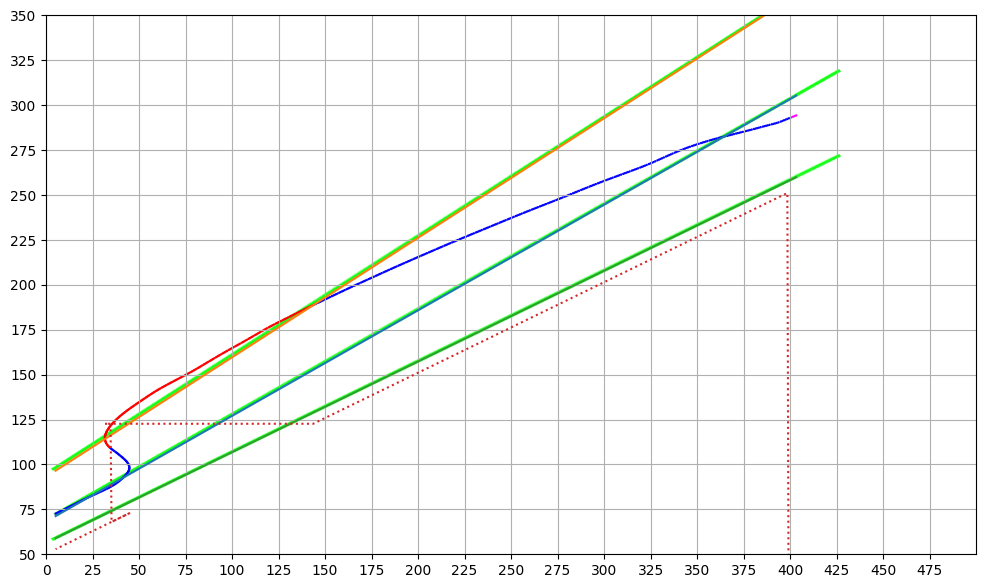

In [5]:
vert_sit_disp(1, data)

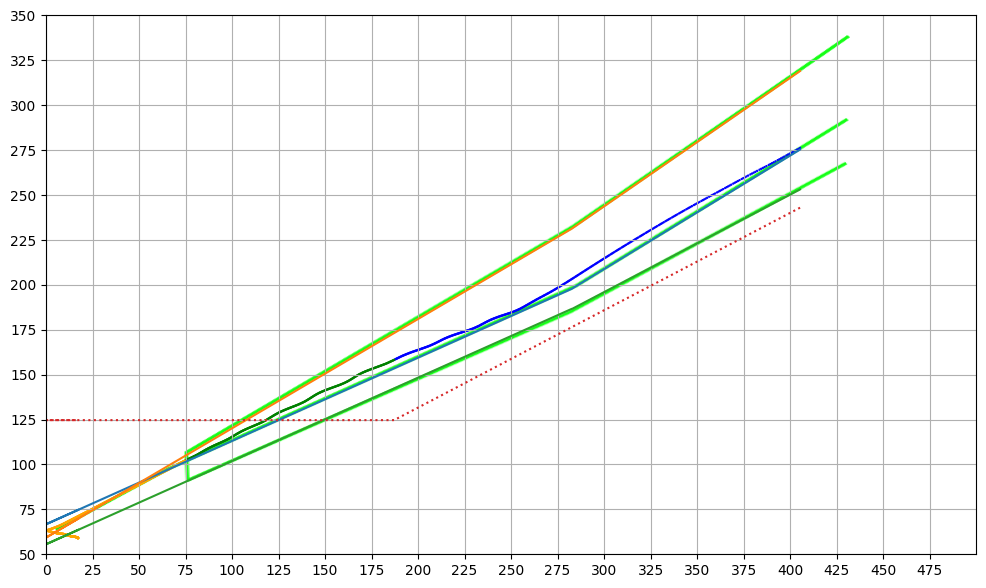

In [6]:
vert_sit_disp(2, data)

In [20]:
grtls_sit_data = data[data['mach'].between(2.5, 8)]

<Figure size 640x480 with 0 Axes>

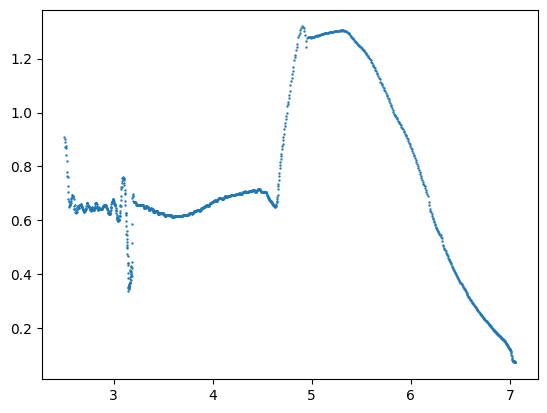

In [21]:
plt.figure()
plt.scatter(
           grtls_sit_data['mach'], 
            grtls_sit_data['nz'], 
            s=0.5
    )

(0.0, 500.0)

(50.0, 350.0)

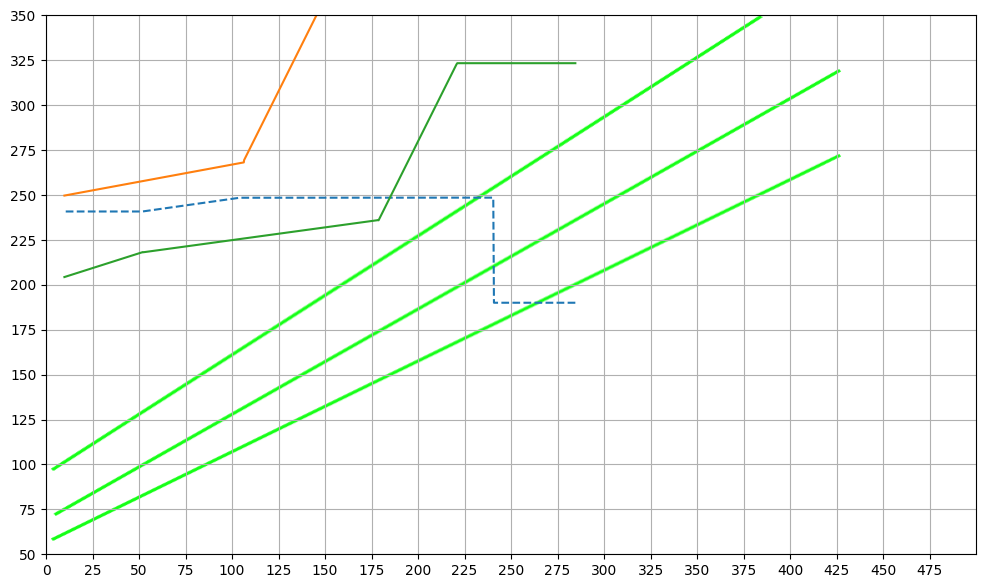

In [34]:
def grtls_x_convert1(mach):
    a = (175 - 10)/(6 - 3)
    b = 10 - a*3

    return a*mach + b
    
    
def grtls_y_convert1(gralp):
    a = (330 - 200)/(45 - 10)
    b = 200 - a*12

    return a*gralp + b



def grtls_x_convert(mach):
    a = (230 - 40)/(6 - 2.85)
    b = 40 - a*3

    return a*mach + b
    
    
def grtls_y_convert(gralp):
    a = (330 - 230)/(40 - 10)
    b = 230 - a*12

    return a*gralp + b



fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 7))

plt_ = ax


img = plt.imread("vsit1_bg.png")
plt_.imshow(img, aspect='auto', extent=[0, 500, 50, 350])

#plt.scatter(
#           grtls_x_convert(grtls_sit_data['mach']), 
#            grtls_y_convert(grtls_sit_data['alpha']), 
#            s=0.5
#    )

plt.plot(
           grtls_x_convert(grtls_sit_data['mach']), 
            grtls_y_convert(grtls_sit_data['gralpr']), 
            '--'
    )
plt.plot(grtls_x_convert(grtls_sit_data['mach']), grtls_y_convert(grtls_sit_data['alpul']))
plt.plot(grtls_x_convert(grtls_sit_data['mach']), grtls_y_convert(grtls_sit_data['alpll']))

major_ticks = np.arange(0, 500, 25)

ax.set_xticks(major_ticks)
ax.set_yticks(major_ticks)

# And a corresponding grid
ax.grid(which='both')

plt_.set_xlim([0, 500])
plt_.set_ylim([50, 350])



    